In [1]:
import pandas as pd
# sys.path.insert(0, 'D:\GitHub Repos\MLib in Python\MLib-in-python')
# import MLib
import warnings
warnings.filterwarnings("ignore")
import sklearn

# Data Preprocess

In [2]:
DFOriginal = pd.read_csv('csv-wsn-ids-ds.csv')
OutPutLabel : str = 'Attack type'
InputLabels : list = DFOriginal.columns.tolist()
InputLabels.remove(OutPutLabel)
print('Input Labels Count: ', len(InputLabels))
InputLabels

Input Labels Count:  18


[' id',
 ' Time',
 ' Is_CH',
 ' who CH',
 ' Dist_To_CH',
 ' ADV_S',
 ' ADV_R',
 ' JOIN_S',
 ' JOIN_R',
 ' SCH_S',
 ' SCH_R',
 'Rank',
 ' DATA_S',
 ' DATA_R',
 ' Data_Sent_To_BS',
 ' dist_CH_To_BS',
 ' send_code ',
 'Expaned Energy']

In [3]:
DFOriginal[OutPutLabel].value_counts().index.tolist()

['Normal', 'Grayhole', 'Blackhole', 'TDMA', 'Flooding']

In [4]:
DFOriginal.dtypes

 id                   int64
 Time                 int64
 Is_CH                int64
 who CH               int64
 Dist_To_CH         float64
 ADV_S                int64
 ADV_R                int64
 JOIN_S               int64
 JOIN_R               int64
 SCH_S                int64
 SCH_R                int64
Rank                  int64
 DATA_S               int64
 DATA_R               int64
 Data_Sent_To_BS      int64
 dist_CH_To_BS      float64
 send_code            int64
Expaned Energy      float64
Attack type          object
dtype: object

In [5]:
DFOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [6]:
# Display the number of missing values in each column
DFOriginal.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Attack type         0
dtype: int64

In [7]:
DFOriginal.describe()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
count,3.746610e+05,374661.000000,374661.000000,3.746610e+05,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000
mean,2.749693e+05,1064.748712,0.115766,2.749804e+05,22.599380,0.267698,6.940562,0.779905,0.737493,0.288984,0.747452,9.687104,44.857925,73.890045,4.569448,22.562735,2.497957,0.305661
std,3.898986e+05,899.646164,0.319945,3.899112e+05,21.955794,2.061148,7.044319,0.414311,4.691498,2.754746,0.434475,14.681901,42.574464,230.246335,19.679155,50.261604,2.407337,0.669462
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


In [8]:
# Display the number of unique values in each column
DFOriginal.nunique()

 id                 11120
 Time                 196
 Is_CH                  2
 who CH              7088
 Dist_To_CH         13956
 ADV_S                 85
 ADV_R                 31
 JOIN_S                 2
 JOIN_R               101
 SCH_S                 95
 SCH_R                  2
Rank                  100
 DATA_S               192
 DATA_R              1345
 Data_Sent_To_BS      237
 dist_CH_To_BS        305
 send_code             16
Expaned Energy      69352
Attack type             5
dtype: int64

In [9]:
print(DFOriginal.duplicated().sum())

8873


In [10]:
DFOriginal.drop_duplicates(inplace=True)

In [11]:
DFOriginal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365788 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               365788 non-null  int64  
 1    Time             365788 non-null  int64  
 2    Is_CH            365788 non-null  int64  
 3    who CH           365788 non-null  int64  
 4    Dist_To_CH       365788 non-null  float64
 5    ADV_S            365788 non-null  int64  
 6    ADV_R            365788 non-null  int64  
 7    JOIN_S           365788 non-null  int64  
 8    JOIN_R           365788 non-null  int64  
 9    SCH_S            365788 non-null  int64  
 10   SCH_R            365788 non-null  int64  
 11  Rank              365788 non-null  int64  
 12   DATA_S           365788 non-null  int64  
 13   DATA_R           365788 non-null  int64  
 14   Data_Sent_To_BS  365788 non-null  int64  
 15   dist_CH_To_BS    365788 non-null  float64
 16   send_code        365788 

array([[<Axes: title={'center': ' id'}>,
        <Axes: title={'center': ' Time'}>,
        <Axes: title={'center': ' Is_CH'}>,
        <Axes: title={'center': ' who CH'}>],
       [<Axes: title={'center': ' Dist_To_CH'}>,
        <Axes: title={'center': ' ADV_S'}>,
        <Axes: title={'center': ' ADV_R'}>,
        <Axes: title={'center': ' JOIN_S'}>],
       [<Axes: title={'center': ' JOIN_R'}>,
        <Axes: title={'center': ' SCH_S'}>,
        <Axes: title={'center': ' SCH_R'}>,
        <Axes: title={'center': 'Rank'}>],
       [<Axes: title={'center': ' DATA_S'}>,
        <Axes: title={'center': ' DATA_R'}>,
        <Axes: title={'center': ' Data_Sent_To_BS'}>,
        <Axes: title={'center': ' dist_CH_To_BS'}>],
       [<Axes: title={'center': ' send_code '}>,
        <Axes: title={'center': 'Expaned Energy'}>, <Axes: >, <Axes: >]],
      dtype=object)

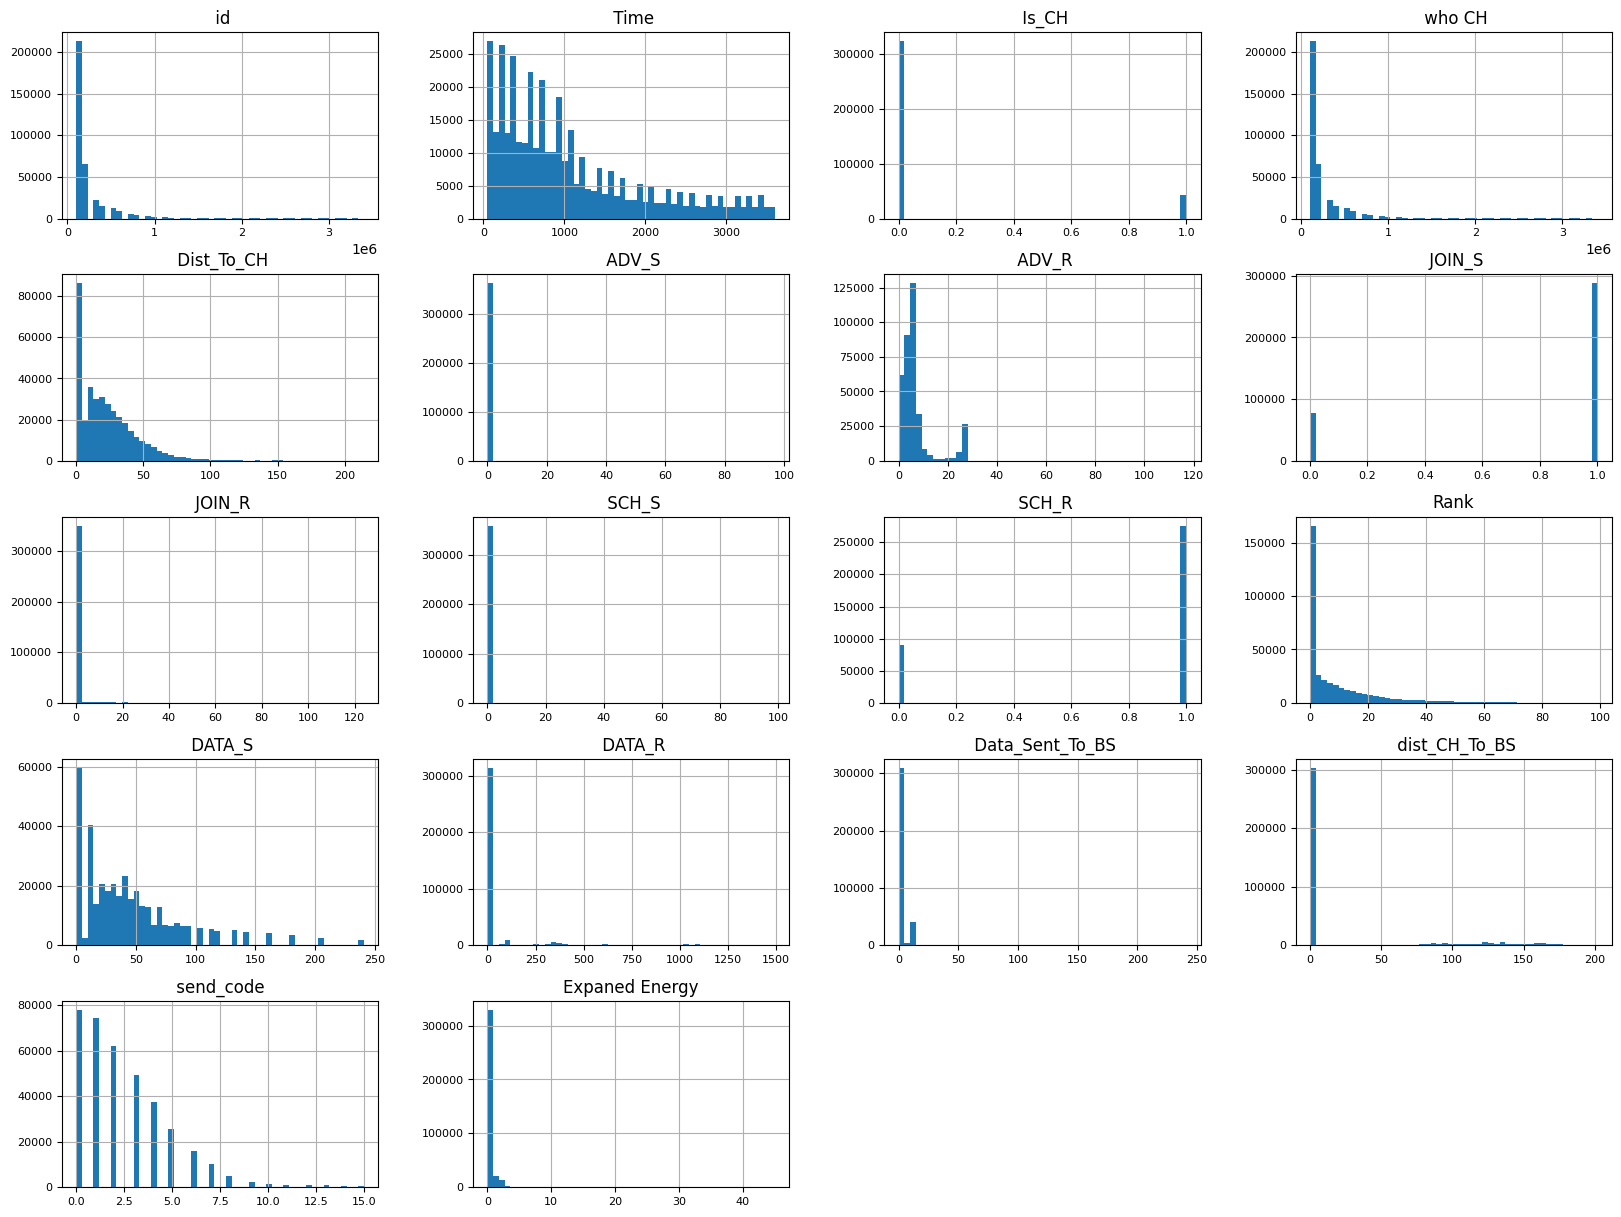

In [12]:
DFOriginal.hist(figsize=(20, 15), bins=50, xlabelsize=8, ylabelsize=8)

In [13]:
# Display the first few rows of the dataset
DFOriginal.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [14]:
DFOriginalInputs = DFOriginal[InputLabels]
DFOriginalOutput = DFOriginal[OutPutLabel]

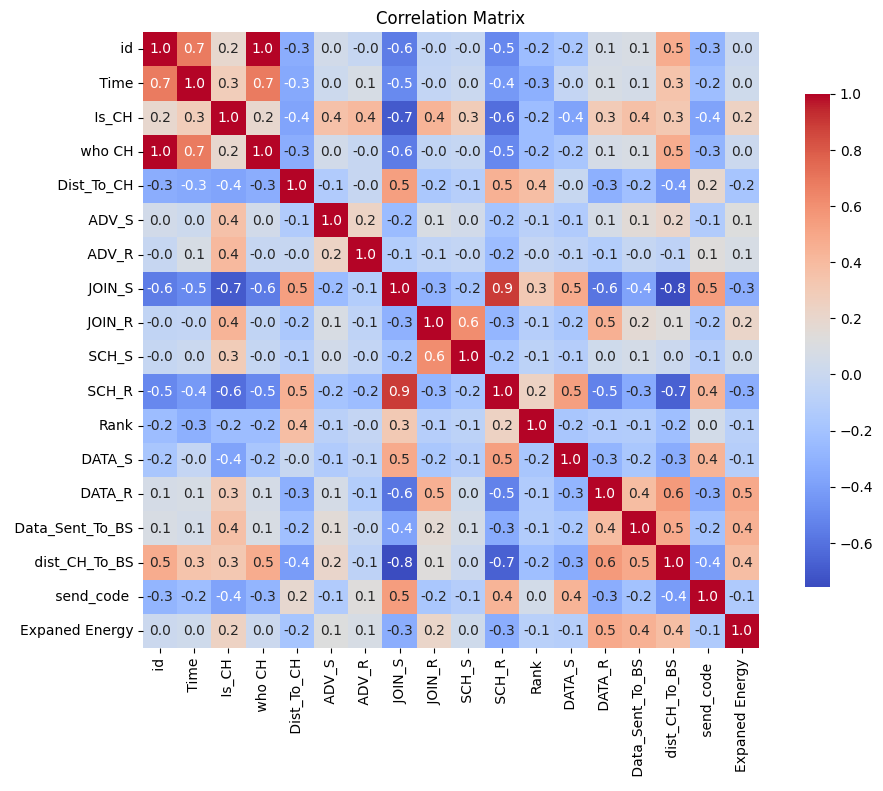

In [15]:
# print th correlation matrix with colored cells
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(DFOriginalInputs.corr(), annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


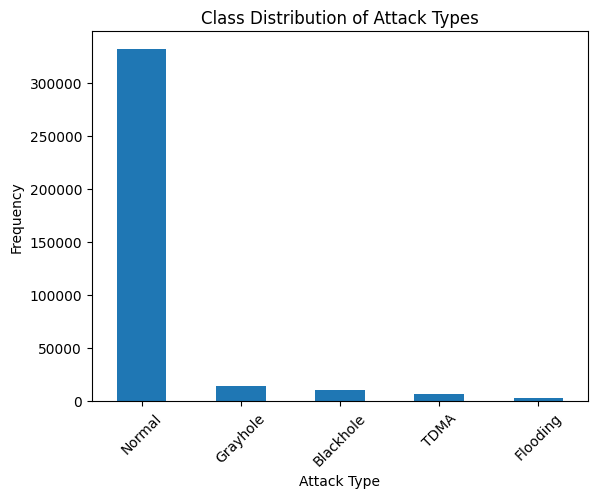

In [16]:
DFOriginalOutput.value_counts().plot(kind='bar')
plt.title('Class Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [17]:
import pandas as pd
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

normal_df = DFOriginal[DFOriginal[OutPutLabel] == 'Normal']
normal_downsampled = resample(normal_df,
                              replace=False,
                              n_samples=100000,
                              random_state=42)

minority_df = DFOriginal[DFOriginal[OutPutLabel] != 'Normal']

combined_df = pd.concat([normal_downsampled, minority_df])
X = combined_df.drop(columns=[OutPutLabel]) 
y = combined_df[OutPutLabel]               

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

DFBalanced = pd.DataFrame(X_resampled, columns=X.columns)
DFBalanced[OutPutLabel] = y_resampled


In [18]:
DFInputs = DFBalanced[InputLabels]
DFOutput = DFBalanced[OutPutLabel]

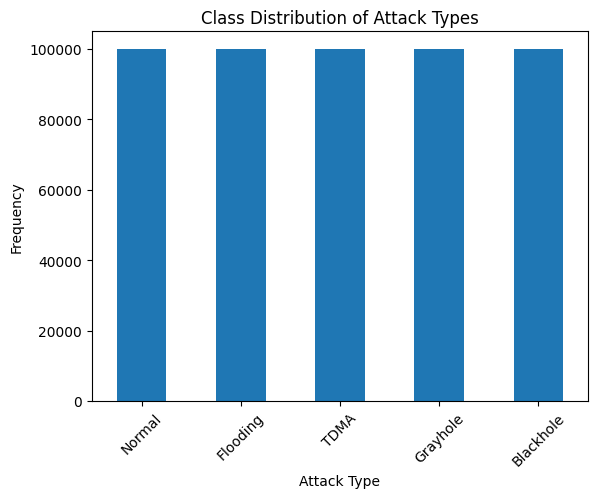

In [19]:
DFOutput.value_counts().plot(kind='bar')
plt.title('Class Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [20]:
def LabelEncoding(DF : pd.DataFrame) -> pd.DataFrame:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    encoded = le.fit_transform(DF)
    return pd.DataFrame(encoded, columns=DF.columns)

In [21]:
DFInputs.shape, DFOutput.shape

((500000, 18), (500000,))

In [22]:
DFOutput = pd.DataFrame(DFOutput)

DFLEOutput = LabelEncoding(DFOutput)
DFLEOutput.head()
DFOutput = DFLEOutput

In [23]:
DFOutput.head()

,Attack type
0,3
1,3
2,3
3,3
4,3


In [24]:
import sklearn.preprocessing

Scaler = sklearn.preprocessing.MinMaxScaler()
DFInputsScaled = pd.DataFrame(Scaler.fit_transform(DFInputs), columns=DFInputs.columns)

In [25]:
DFInputs = DFInputsScaled
DFInputs

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
0,0.000021,0.000845,0.0,0.000027,0.000000,0.000000,0.230769,1.0,0.000000,0.000000,1.0,0.727273,0.058091,0.000000,0.000000,0.000000,0.133333,0.000563
1,0.004551,0.212113,0.0,0.004554,0.027131,0.000000,0.017094,1.0,0.000000,0.000000,1.0,0.010101,0.203320,0.000000,0.000000,0.000000,0.066667,0.001862
2,0.062129,0.592394,0.0,0.062127,0.043337,0.000000,0.085470,1.0,0.000000,0.000000,1.0,0.010101,0.543568,0.000000,0.000000,0.000000,0.333333,0.004821
3,0.005475,0.254366,0.0,0.005475,0.245320,0.000000,0.051282,1.0,0.000000,0.000000,1.0,0.070707,0.141079,0.000000,0.000000,0.000000,0.333333,0.001421
4,0.000028,0.000845,0.0,0.000014,0.082892,0.000000,0.051282,1.0,0.000000,0.000000,1.0,0.060606,0.282158,0.000000,0.000000,0.000000,0.133333,0.002461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.000938,0.043099,0.0,0.000914,0.203283,0.000000,0.034188,1.0,0.000000,0.000000,1.0,0.393939,0.070539,0.000000,0.000000,0.000000,0.200000,0.000759
499996,0.151472,0.737183,1.0,0.151495,0.000000,0.010309,0.068376,0.0,0.008065,0.010101,0.0,0.000000,0.000000,0.149733,0.929461,0.413351,0.000000,0.045949
499997,0.060600,0.437465,1.0,0.060599,0.000000,0.010309,0.059829,0.0,0.048387,0.060606,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004032
499998,0.152999,0.944507,1.0,0.153010,0.000000,0.010309,0.068376,0.0,0.048387,0.060606,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000144


In [26]:
# from sklearn.ensemble import RandomForestClassifier
# import pandas as pd

# import matplotlib.pyplot as plt

# RF = RandomForestClassifier(n_estimators=100, random_state=42)
# RF.fit(DFInputs, DFOutput)

# feature_importances = pd.Series(RF.feature_importances_, index=DFInputs.columns)

# sorted_features = feature_importances.sort_values(ascending=False)

# top_features = sorted_features.head(12).index.tolist()
# print("Top 12 Features:", top_features)

# plt.figure(figsize=(12, 6))
# sorted_features.plot(kind='bar')
# plt.title('Feature Importances')
# plt.xlabel('Features')
# plt.ylabel('Importance Score')
# plt.show()
top_features = [' ADV_S', ' SCH_S', 'Expaned Energy', ' Is_CH', ' dist_CH_To_BS', ' Data_Sent_To_BS', ' DATA_R', ' JOIN_R', ' ADV_R', ' DATA_S', 'Rank', ' Time']

In [27]:
top_features


[' ADV_S',
 ' SCH_S',
 'Expaned Energy',
 ' Is_CH',
 ' dist_CH_To_BS',
 ' Data_Sent_To_BS',
 ' DATA_R',
 ' JOIN_R',
 ' ADV_R',
 ' DATA_S',
 'Rank',
 ' Time']

In [28]:
print('Inputs Features before:', DFInputs.shape)
DFInputs = DFInputs[top_features]
print('Inputs Features after:', DFInputs.shape)

Inputs Features before: (500000, 18)
Inputs Features after: (500000, 12)


In [29]:
DFCombined = pd.concat([DFInputs, DFOutput], axis=1)
DFCombined.to_csv('ProcessedDataSet.csv', index=False)
print("Combined DataFrame saved as 'ProcessedDataSet.csv'")

Combined DataFrame saved as 'ProcessedDataSet.csv'


In [28]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
TrainInput, TestInput, TrainOutput, TestOutput = train_test_split(DFInputs, DFOutput, train_size=0.8, random_state=42, stratify=DFOutput)

In [29]:
import sklearn.metrics
def ComputeMetrics(ytrue, ypredicted, ypredictedProba):
    accuracy = sklearn.metrics.accuracy_score(TestOutput,ypredicted)
    balanced_accuracy = sklearn.metrics.balanced_accuracy_score(TestOutput,ypredicted)
    precision = sklearn.metrics.precision_score(TestOutput,ypredicted,average='weighted')
    recall = sklearn.metrics.recall_score(TestOutput,ypredicted,average='weighted')
    f1 = sklearn.metrics.f1_score(TestOutput,ypredicted,average='weighted')
    roc_auc = sklearn.metrics.roc_auc_score(TestOutput,ypredictedProba, average='weighted', multi_class='ovr')
    matthews_corrcoef = sklearn.metrics.matthews_corrcoef(TestOutput,ypredicted)
    return accuracy, balanced_accuracy, precision, recall, f1, roc_auc, matthews_corrcoef


In [30]:
class_names = DFOriginal[OutPutLabel].unique()
def VisualizeConfusionMatrix(ConfusionMatrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - Logistic Regression')
    plt.show()

# 1- Logistic Regression

In [31]:
import sklearn.linear_model
# make a random search for the best hyperparameters of the logistic regression model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'C': uniform(0.1, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': randint(100, 1000)
}

ModelLR = sklearn.linear_model.LogisticRegression(class_weight='balanced')
random_search = RandomizedSearchCV(ModelLR, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())

best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)

ModelLR = sklearn.linear_model.LogisticRegression(**best_params, class_weight='balanced')
ModelLR.fit(TrainInput, TrainOutput.values.ravel())

# ModelLR = sklearn.linear_model.LogisticRegression(max_iter=1000,solver='newton-cg',class_weight='balanced')
# ModelLR.fit(TrainInput, TrainOutput)

Best Hyperparameters:  {'C': np.float64(7.896910002727692), 'max_iter': 120, 'penalty': 'l1', 'solver': 'liblinear'}


LogisticRegression(C=np.float64(7.896910002727692), class_weight='balanced',
                   max_iter=120, penalty='l1', solver='liblinear')

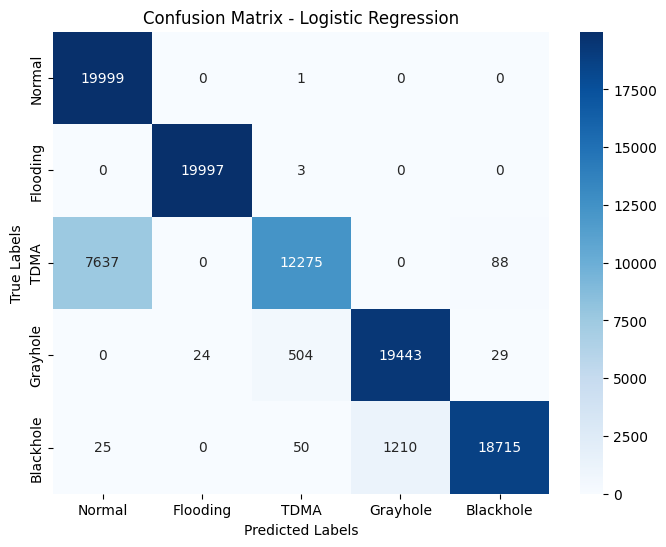

In [32]:
ypred = ModelLR.predict(TestInput)
ypredProba = ModelLR.predict_proba(TestInput)
ConfusionMatrixLR = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixLR)

In [33]:
LogLossLR = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossLR)

Log Loss:  0.20812735218325826


In [34]:
accuracyLR, balanced_accuracyLR, precisionLR, recallLR, f1LR, roc_aucLR, matthews_corrcoefLR = ComputeMetrics(TestOutput, ypred, ypredProba)

In [35]:
print(f'{'accuracy': <30}', accuracyLR)
print(f'{'balanced_accuracy': <30}', balanced_accuracyLR)
print(f'{'precision': <30}', precisionLR)
print(f'{'recall': <30}', recallLR)
print(f'{'f1': <30}', f1LR)
print(f'{'roc_auc': <30}', roc_aucLR)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefLR)

accuracy                       0.90429
balanced_accuracy              0.9042899999999999
precision                      0.9227046314241769
recall                         0.90429
f1                             0.9013395317743823
roc_auc                        0.9862979915000001
matthews_corrcoef              0.8865819598242416


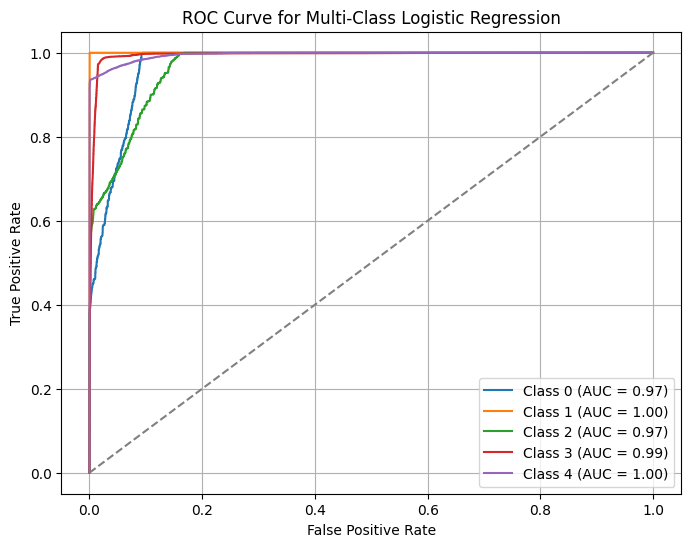

In [36]:
import sklearn.metrics


plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixLR.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 2- Decision Tree

In [37]:
import sklearn.tree
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
}
ModelDT = sklearn.tree.DecisionTreeClassifier(class_weight='balanced')
random_search = RandomizedSearchCV(ModelDT, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)
ModelDT = sklearn.tree.DecisionTreeClassifier(**best_params, class_weight='balanced')
ModelDT.fit(TrainInput, TrainOutput.values.ravel())

# ModelDT = sklearn.tree.DecisionTreeClassifier(class_weight='balanced')
# ModelDT.fit(TrainInput, TrainOutput.values.ravel())

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 19, 'max_features': 'log2', 'min_samples_leaf': 11, 'min_samples_split': 12}


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=19, max_features='log2', min_samples_leaf=11,
                       min_samples_split=12)

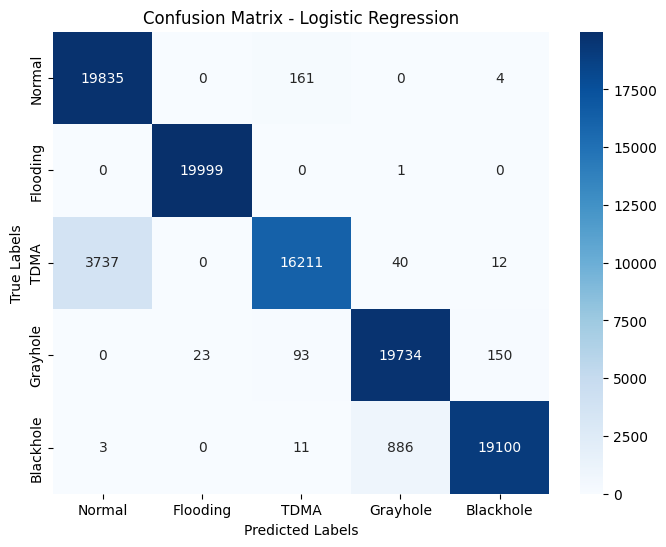

In [38]:
ypred = ModelDT.predict(TestInput)
ypredProba = ModelDT.predict_proba(TestInput)
ConfusionMatrixDT = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixDT)

In [39]:
accuracyDT, balanced_accuracyDT, precisionDT, recallDT, f1DT, roc_aucDT, matthews_corrcoefDT = ComputeMetrics(TestOutput, ypred, ypredProba)

In [40]:
print(f'{'accuracy': <30}', accuracyDT)
print(f'{'balanced_accuracy': <30}', balanced_accuracyDT)
print(f'{'precision': <30}', precisionDT)
print(f'{'recall': <30}', recallDT)
print(f'{'f1': <30}', f1DT)
print(f'{'roc_auc': <30}', roc_aucDT)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefDT)

accuracy                       0.94879
balanced_accuracy              0.94879
precision                      0.9541282553300279
recall                         0.94879
f1                             0.9484309658288627
roc_auc                        0.995839549125
matthews_corrcoef              0.937522506069323


In [41]:
LogLossDT = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossDT)

Log Loss:  0.140704889519171


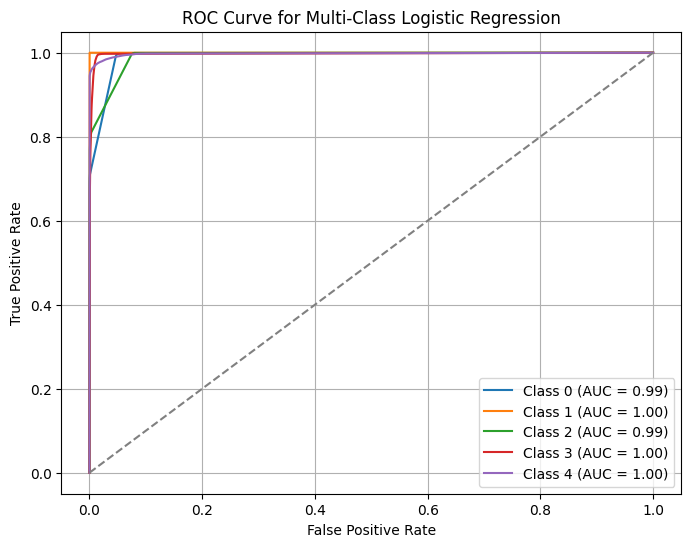

In [42]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixDT.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 3- Random Forest

In [43]:
# make a random search for the best hyperparameters of the random forest model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_estimators': randint(10, 200),
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
}
ModelRF = sklearn.ensemble.RandomForestClassifier(class_weight='balanced')
random_search = RandomizedSearchCV(ModelRF, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)
ModelRF = sklearn.ensemble.RandomForestClassifier(**best_params, class_weight='balanced')
ModelRF.fit(TrainInput, TrainOutput.values.ravel())

# ModelRF = sklearn.ensemble.RandomForestClassifier(class_weight='balanced')
# ModelRF.fit(TrainInput, TrainOutput)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 131}


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       max_features='log2', min_samples_leaf=8,
                       min_samples_split=8, n_estimators=131)

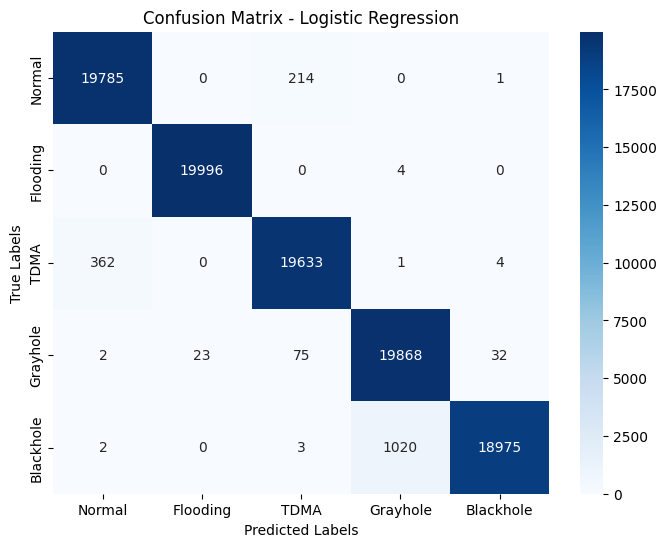

In [44]:
ypred = ModelRF.predict(TestInput)
ypredProba = ModelRF.predict_proba(TestInput)
ConfusionMatrixRF = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixRF)

In [45]:
accuracyRF, balanced_accuracyRF, precisionRF, recallRF, f1RF, roc_aucRF, matthews_corrcoefRF = ComputeMetrics(TestOutput, ypred, ypredProba)

In [46]:
print(f'{'accuracy': <30}', accuracyRF)
print(f'{'balanced_accuracy': <30}', balanced_accuracyRF)
print(f'{'precision': <30}', precisionRF)
print(f'{'recall': <30}', recallRF)
print(f'{'f1': <30}', f1RF)
print(f'{'roc_auc': <30}', roc_aucRF)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefRF)

accuracy                       0.98257
balanced_accuracy              0.9825699999999999
precision                      0.983005526431604
recall                         0.98257
f1                             0.98256665068642
roc_auc                        0.9994621848749999
matthews_corrcoef              0.9783227130387506


In [47]:
LogLossRF = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossRF)

Log Loss:  0.05528842478938241


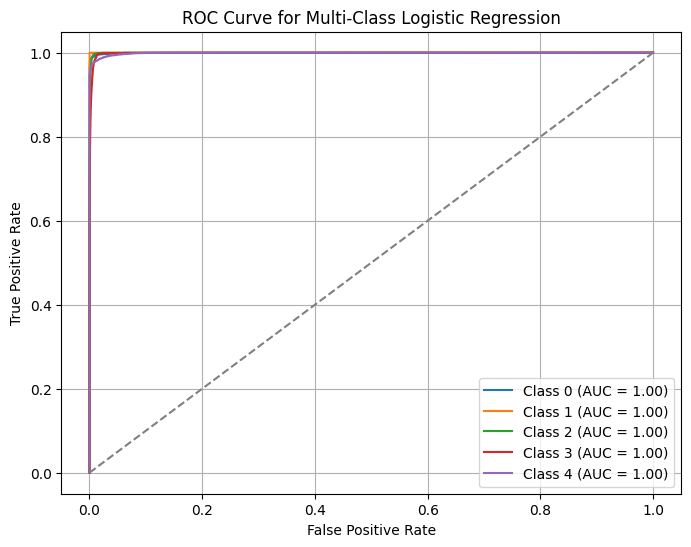

In [48]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixRF.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 4- KNN

In [49]:
# knn
import sklearn.neighbors
# make a random search for the best hyperparameters of the knn model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': randint(1, 50),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}
ModelKNN = sklearn.neighbors.KNeighborsClassifier()
random_search = RandomizedSearchCV(ModelKNN, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)
ModelKNN = sklearn.neighbors.KNeighborsClassifier(**best_params)
ModelKNN.fit(TrainInput, TrainOutput.values.ravel())


# ModelKNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=7)
# ModelKNN.fit(TrainInput, TrainOutput.values.ravel())

Best Hyperparameters:  {'algorithm': 'brute', 'leaf_size': 3, 'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


KNeighborsClassifier(algorithm='brute', leaf_size=3, metric='manhattan',
                     n_neighbors=2, weights='distance')

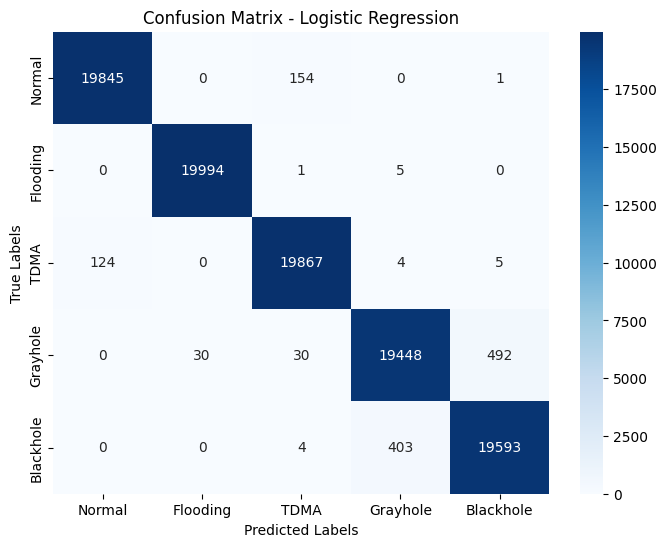

In [50]:
ypred = ModelKNN.predict(TestInput)
ypredProba = ModelKNN.predict_proba(TestInput)
ConfusionMatrixKNN = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixKNN)


In [51]:
accuracyKNN, balanced_accuracyKNN, precisionKNN, recallKNN, f1KNN, roc_aucKNN, matthews_corrcoefKNN = ComputeMetrics(TestOutput, ypred, ypredProba)

In [52]:
print(f'{'accuracy': <30}', accuracyKNN)
print(f'{'balanced_accuracy': <30}', balanced_accuracyKNN)
print(f'{'precision': <30}', precisionKNN)
print(f'{'recall': <30}', recallKNN)
print(f'{'f1': <30}', f1KNN)
print(f'{'roc_auc': <30}', roc_aucKNN)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefKNN)

accuracy                       0.98747
balanced_accuracy              0.9874700000000001
precision                      0.9874672248739678
recall                         0.98747
f1                             0.9874646185766012
roc_auc                        0.9955707429374999
matthews_corrcoef              0.9843395027637982


In [53]:
LogLossKNN = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossKNN)

Log Loss:  0.2641852047109802


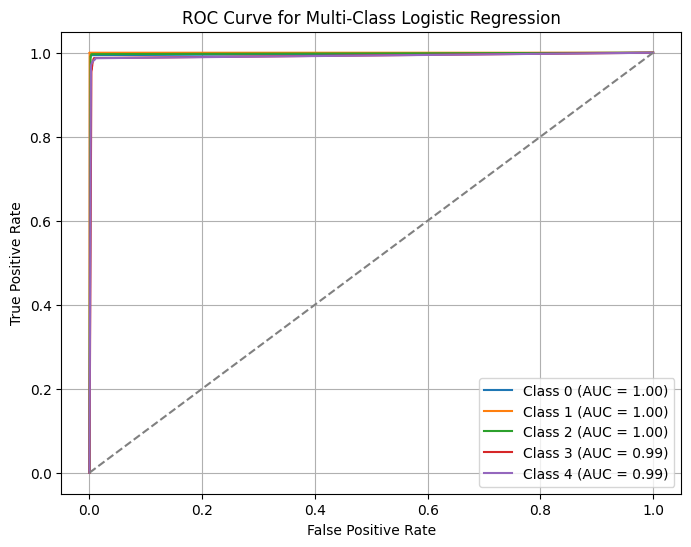

In [54]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixKNN.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 5- XGB Classifier

In [55]:
# XGBClassifier

import xgboost as xgb
# make a random search for the best hyperparameters of the xgboost model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 5),
}
ModelXGB = xgb.XGBClassifier(class_weight='balanced')
random_search = RandomizedSearchCV(ModelXGB, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)
ModelXGB = xgb.XGBClassifier(**best_params, class_weight='balanced')
ModelXGB.fit(TrainInput, TrainOutput.values.ravel())

# ModelXGB = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', class_weight='balanced')
# ModelXGB.fit(TrainInput, TrainOutput.values.ravel())

Best Hyperparameters:  {'colsample_bytree': np.float64(0.7838501639099957), 'gamma': np.float64(0.15656646227779292), 'learning_rate': np.float64(0.26268543237849956), 'max_depth': 12, 'n_estimators': 171, 'subsample': np.float64(0.6975751180009072)}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None,
              colsample_bytree=np.float64(0.7838501639099957), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=np.float64(0.15656646227779292), grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.26268543237849956), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=171, n_jobs=None, ...)

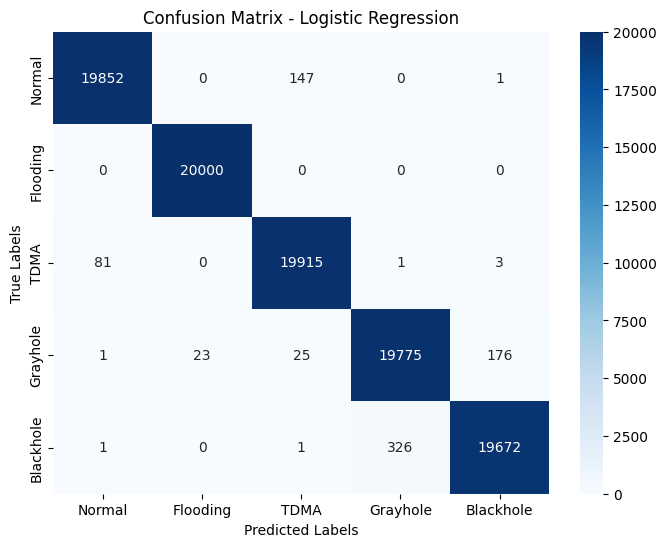

In [56]:
ypred = ModelXGB.predict(TestInput)
ypredProba = ModelXGB.predict_proba(TestInput)
ConfusionMatrixXGB = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixXGB)


In [57]:
accuracyXGB, balanced_accuracyXGB, precisionXGB, recallXGB, f1XGB, roc_aucXGB, matthews_corrcoefXGB = ComputeMetrics(TestOutput, ypred, ypredProba)

In [58]:
print(f'{'accuracy': <30}', accuracyXGB)
print(f'{'balanced_accuracy': <30}', balanced_accuracyXGB)
print(f'{'precision': <30}', precisionXGB)
print(f'{'recall': <30}', recallXGB)
print(f'{'f1': <30}', f1XGB)
print(f'{'roc_auc': <30}', roc_aucXGB)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefXGB)

accuracy                       0.99214
balanced_accuracy              0.99214
precision                      0.9921483096306637
recall                         0.99214
f1                             0.9921386051242314
roc_auc                        0.9998400084375
matthews_corrcoef              0.9901777728729633


In [59]:
LogLossXGB = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossXGB)

Log Loss:  0.024597852233326202


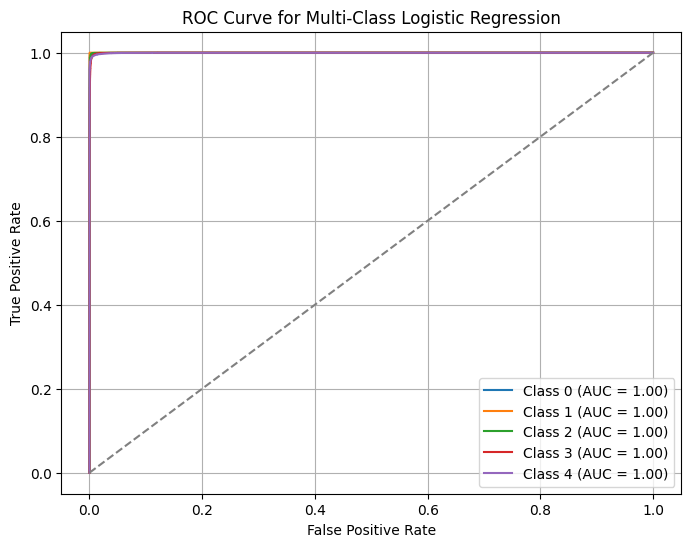

In [60]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixXGB.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 6- LGBM Classifier

In [61]:
# LGBMClassifier
import lightgbm as lgb
# make a random search for the best hyperparameters of the lightgbm model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}
ModelLGBM = lgb.LGBMClassifier()
random_search = RandomizedSearchCV(ModelLGBM, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)
ModelLGBM = lgb.LGBMClassifier(**best_params)
ModelLGBM.fit(TrainInput, TrainOutput.values.ravel())

# ModelLGBM = lgb.LGBMClassifier()
# ModelLGBM.fit(TrainInput, TrainOutput.values.ravel())


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 400000, number of used features: 12
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(colsample_bytree=np.float64(0.9697494707820946),
               learning_rate=np.float64(0.27844820512829466), max_depth=14,
               n_estimators=104, reg_alpha=np.float64(0.9218742350231168),
               reg_lambda=np.float64(0.0884925020519195),
               subsample=np.float64(0.5979914312095727))

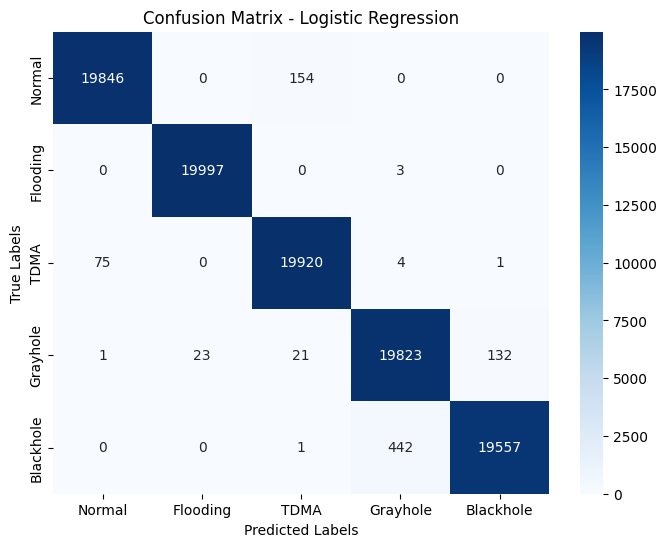

In [62]:
ypred = ModelLGBM.predict(TestInput)
ypredProba = ModelLGBM.predict_proba(TestInput)
ConfusionMatrixLGBM = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixLGBM)

In [63]:
accuracyLGBM, balanced_accuracyLGBM, precisionLGBM, recallLGBM, f1LGBM, roc_aucLGBM, matthews_corrcoefLGBM = ComputeMetrics(TestOutput, ypred, ypredProba)

In [64]:
print(f'{'accuracy': <30}', accuracyLGBM)
print(f'{'balanced_accuracy': <30}', balanced_accuracyLGBM)
print(f'{'precision': <30}', precisionLGBM)
print(f'{'recall': <30}', recallLGBM)
print(f'{'f1': <30}', f1LGBM)
print(f'{'roc_auc': <30}', roc_aucLGBM)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefLGBM)


accuracy                       0.99143
balanced_accuracy              0.99143
precision                      0.9914749669179075
recall                         0.99143
f1                             0.9914295286462093
roc_auc                        0.9998245545
matthews_corrcoef              0.989298987311884


In [65]:
LogLossLGBM = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossLGBM)

Log Loss:  0.025447791275892268


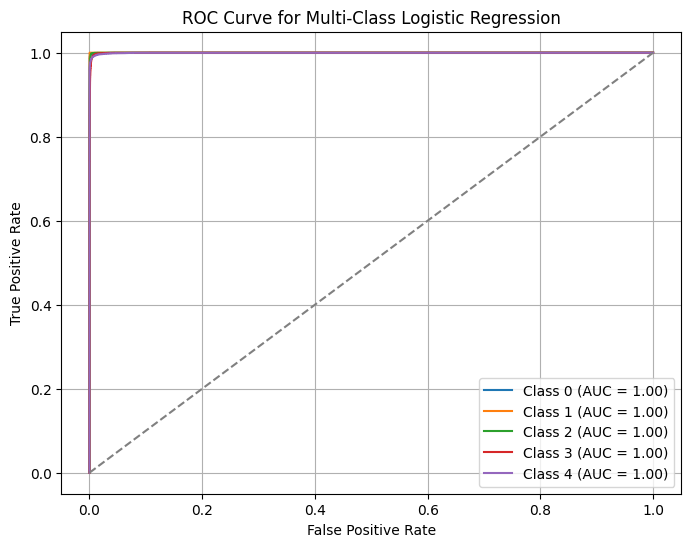

In [66]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixLGBM.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 7- Extra Trees Classifier

In [67]:
# ExtraTreesClassifier
import sklearn.ensemble
# make a random search for the best hyperparameters of the ExtraTreesClassifier model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_estimators': randint(10, 200),
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
}
ModelETC = sklearn.ensemble.ExtraTreesClassifier(class_weight='balanced')
random_search = RandomizedSearchCV(ModelETC, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)
ModelETC = sklearn.ensemble.ExtraTreesClassifier(**best_params, class_weight='balanced')
ModelETC.fit(TrainInput, TrainOutput.values.ravel())
# ModelETC = sklearn.ensemble.ExtraTreesClassifier(class_weight='balanced')
# ModelETC.fit(TrainInput, TrainOutput.values.ravel())


Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 131}


ExtraTreesClassifier(class_weight='balanced', max_depth=15, max_features='log2',
                     min_samples_leaf=8, min_samples_split=8, n_estimators=131)

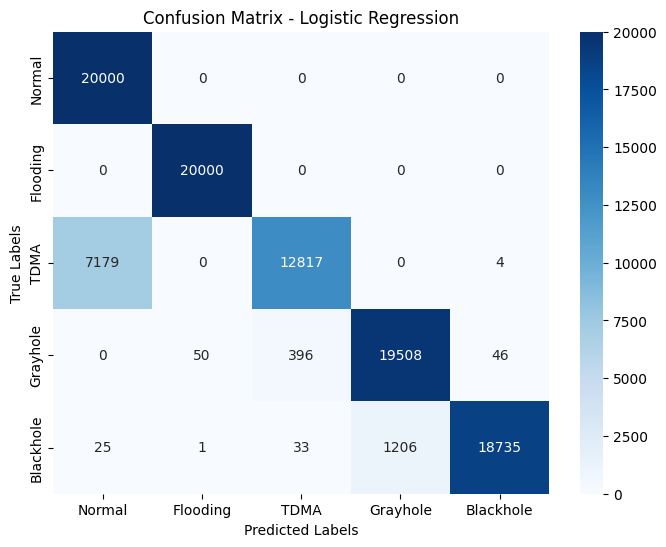

In [68]:
ypred = ModelETC.predict(TestInput)
ypredProba = ModelETC.predict_proba(TestInput)
ConfusionMatrixETC = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixETC)


In [69]:
accuracyETC, balanced_accuracyETC, precisionETC, recallETC, f1ETC, roc_aucETC, matthews_corrcoefETC = ComputeMetrics(TestOutput, ypred, ypredProba)

In [70]:
print(f'{'accuracy': <30}', accuracyETC)
print(f'{'balanced_accuracy': <30}', balanced_accuracyETC)
print(f'{'precision': <30}', precisionETC)
print(f'{'recall': <30}', recallETC)
print(f'{'f1': <30}', f1ETC)
print(f'{'roc_auc': <30}', roc_aucETC)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefETC)



accuracy                       0.9106
balanced_accuracy              0.9106
precision                      0.9278744322813115
recall                         0.9106
f1                             0.9083084294978927
roc_auc                        0.9959522755
matthews_corrcoef              0.8938260271465311


In [71]:
LogLossETC = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossETC)


Log Loss:  0.21955481029855456


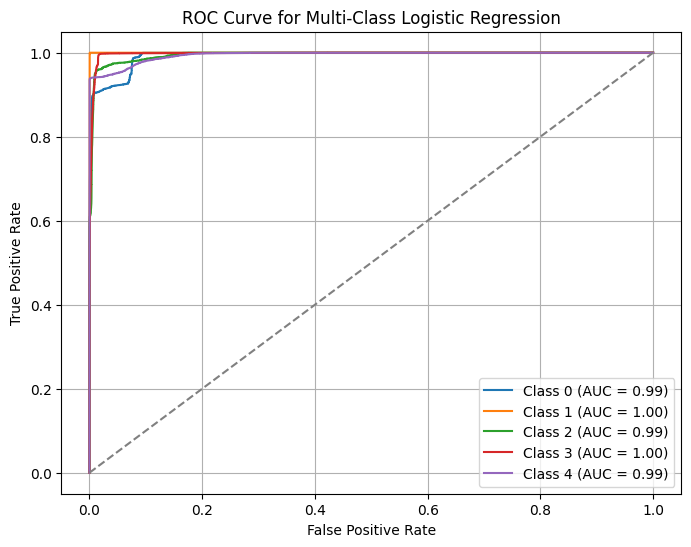

In [72]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixETC.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 8- Bagging Classifier

In [73]:
# BaggingClassifier
import sklearn.ensemble
# make a random search for the best hyperparameters of the BaggingClassifier model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_estimators': randint(10, 200),
    'max_samples': uniform(0.1, 1.0),
    'max_features': uniform(0.1, 1.0),
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
}
ModelBC = sklearn.ensemble.BaggingClassifier()
random_search = RandomizedSearchCV(ModelBC, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)
ModelBC = sklearn.ensemble.BaggingClassifier(**best_params)
ModelBC.fit(TrainInput, TrainOutput.values.ravel())
# ModelBC = sklearn.ensemble.BaggingClassifier()
# ModelBC.fit(TrainInput, TrainOutput.values.ravel())


Best Hyperparameters:  {'bootstrap': False, 'bootstrap_features': False, 'max_features': np.float64(0.9083973481164611), 'max_samples': np.float64(0.40461376917337066), 'n_estimators': 62}


BaggingClassifier(bootstrap=False, max_features=np.float64(0.9083973481164611),
                  max_samples=np.float64(0.40461376917337066), n_estimators=62)

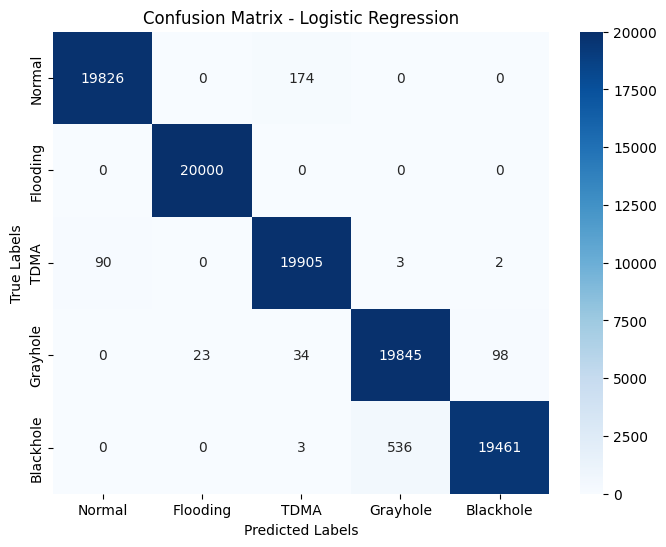

In [74]:
ypred = ModelBC.predict(TestInput)
ypredProba = ModelBC.predict_proba(TestInput)
ConfusionMatrixBC = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixBC)


In [75]:
accuracyBC, balanced_accuracyBC, precisionBC, recallBC, f1BC, roc_aucBC, matthews_corrcoefBC = ComputeMetrics(TestOutput, ypred, ypredProba)

In [76]:
print(f'{'accuracy': <30}', accuracyBC)
print(f'{'balanced_accuracy': <30}', balanced_accuracyBC)
print(f'{'precision': <30}', precisionBC)
print(f'{'recall': <30}', recallBC)
print(f'{'f1': <30}', f1BC)
print(f'{'roc_auc': <30}', roc_aucBC)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefBC)


accuracy                       0.99037
balanced_accuracy              0.9903699999999999
precision                      0.9904577315282566
recall                         0.99037
f1                             0.9903692534338672
roc_auc                        0.9996710344999999
matthews_corrcoef              0.9879848051202429


In [77]:
LogLossBC = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossBC)


Log Loss:  0.045285403517465544


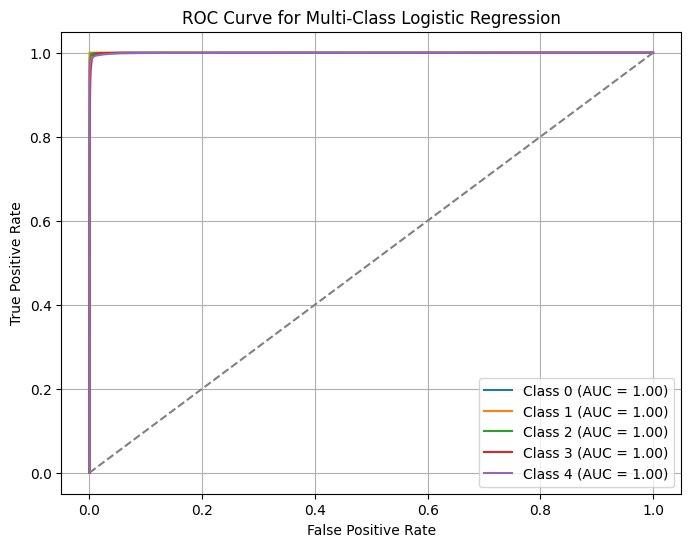

In [78]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixBC.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# 9- Gradient Boosting Classifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_distributions = {
    'n_estimators': randint(10, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.5, 0.5),
    'max_features': ['auto', 'sqrt', 'log2'],
}

ModelGBC = GradientBoostingClassifier()
random_search = RandomizedSearchCV(ModelGBC, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
random_search.fit(TrainInput, TrainOutput.values.ravel())

best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)

ModelGBC = GradientBoostingClassifier(**best_params)
ModelGBC.fit(TrainInput, TrainOutput.values.ravel())

# ModelGBC = GradientBoostingClassifier()
# ModelGBC.fit(TrainInput, TrainOutput.values.ravel())

Best Hyperparameters:  {'learning_rate': np.float64(0.12236203565420874), 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 131, 'subsample': np.float64(0.5779972601681014)}


GradientBoostingClassifier(learning_rate=np.float64(0.12236203565420874),
                           max_depth=15, max_features='log2',
                           min_samples_leaf=8, min_samples_split=8,
                           n_estimators=131,
                           subsample=np.float64(0.5779972601681014))

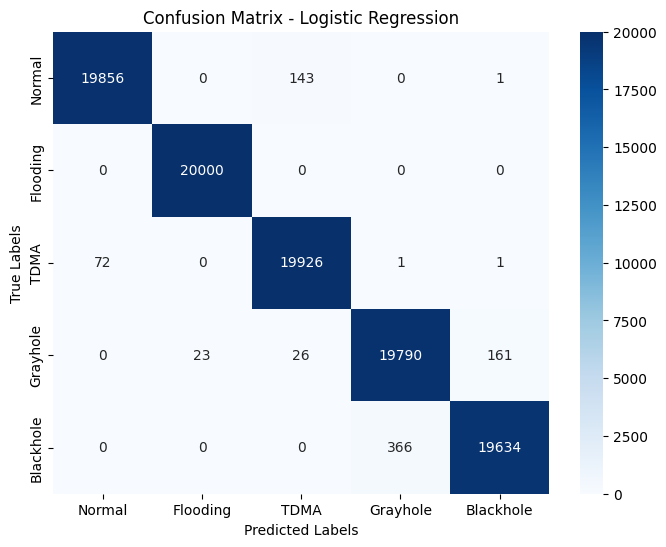

In [80]:
ypred = ModelGBC.predict(TestInput)
ypredProba = ModelGBC.predict_proba(TestInput)
ConfusionMatrixGBC = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixGBC)

In [81]:
accuracyGBC, balanced_accuracyGBC, precisionGBC, recallGBC, f1GBC, roc_aucGBC, matthews_corrcoefGBC = ComputeMetrics(TestOutput, ypred, ypredProba)

In [82]:
print(f'{'accuracy': <30}', accuracyGBC)
print(f'{'balanced_accuracy': <30}', balanced_accuracyGBC)
print(f'{'precision': <30}', precisionGBC)
print(f'{'recall': <30}', recallGBC)
print(f'{'f1': <30}', f1GBC)
print(f'{'roc_auc': <30}', roc_aucGBC)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefGBC)


accuracy                       0.99206
balanced_accuracy              0.99206
precision                      0.9920775233392022
recall                         0.99206
f1                             0.9920587848767871
roc_auc                        0.9998013225
matthews_corrcoef              0.9900799872929771


In [83]:
LogLossGBC = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossGBC)


Log Loss:  0.028898072811440023


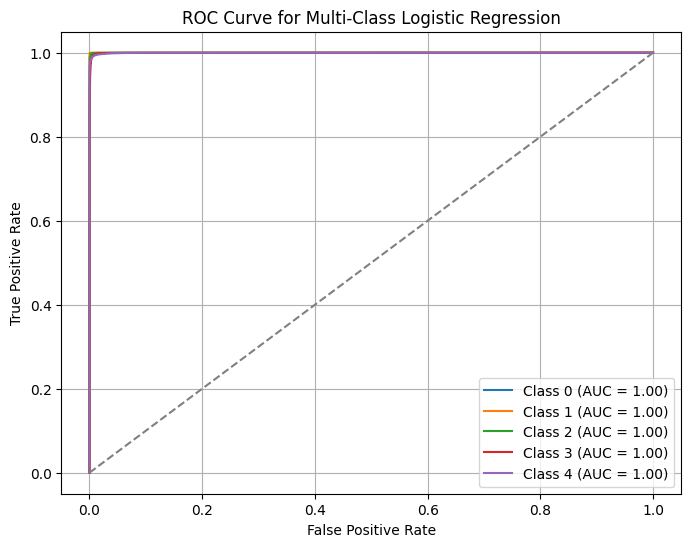

In [84]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixGBC.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# Visualizations and Comparisons

In [85]:
ModelNames = [
    "Logistic Regression", "Decision Tree", "Random Forest", "KNN",
    "XGBoost", "LightGBM", "Extra Trees", "Bagging", "Gradient Boosting Classifier"
]
MetricNames = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Log Loss', 'Matthews Correlation Coefficient']


In [86]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from builtins import min, max

def PlotArrayVSModelNames(array, PlotName : str):
    sorted_indices = numpy.argsort(array)
    sorted_array = numpy.array(array)[sorted_indices]
    sorted_names = numpy.array(ModelNames)[sorted_indices]

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=sorted_array, y=sorted_names, palette="Blues_d", orient='h')

    for i, (loss, name) in enumerate(zip(sorted_array, sorted_names)):
        plt.text(loss + 0.001, i, f"{loss:.4f}", va='center', fontsize=9)

    min_loss = min(sorted_array)
    max_loss = max(sorted_array)
    plt.xlim(min_loss - 0.01, max_loss + 0.01)

    plt.xlabel(PlotName)
    plt.title(f"Model {PlotName} Comparison")
    plt.tight_layout()
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()


In [87]:

ModelsMetrics = {
    'Logistic Regression': {
        'Accuracy': accuracyLR,
        'Balanced Accuracy': balanced_accuracyLR,
        'Precision': precisionLR,
        'Recall': recallLR,
        'F1-Score': f1LR,
        'ROC AUC': roc_aucLR,
        'Log Loss': LogLossLR,
        'Matthews Correlation Coefficient': matthews_corrcoefLR,
    },
    'Decision Tree': {
        'Accuracy': accuracyDT,
        'Balanced Accuracy': balanced_accuracyDT,
        'Precision': precisionDT,
        'Recall': recallDT,
        'F1-Score': f1DT,
        'ROC AUC': roc_aucDT,
        'Log Loss': LogLossDT,
        'Matthews Correlation Coefficient': matthews_corrcoefDT,
    },
    'Random Forest': {
        'Accuracy': accuracyRF,
        'Balanced Accuracy': balanced_accuracyRF,
        'Precision': precisionRF,
        'Recall': recallRF,
        'F1-Score': f1RF,
        'ROC AUC': roc_aucRF,
        'Log Loss': LogLossRF,
        'Matthews Correlation Coefficient': matthews_corrcoefRF,
    },
    'KNN': {
        'Accuracy': accuracyKNN,
        'Balanced Accuracy': balanced_accuracyKNN,
        'Precision': precisionKNN,
        'Recall': recallKNN,
        'F1-Score': f1KNN,
        'ROC AUC': roc_aucKNN,
        'Log Loss': LogLossKNN,
        'Matthews Correlation Coefficient': matthews_corrcoefKNN,
    },
    'XGBoost': {
        'Accuracy': accuracyXGB,
        'Balanced Accuracy': balanced_accuracyXGB,
        'Precision': precisionXGB,
        'Recall': recallXGB,
        'F1-Score': f1XGB,
        'ROC AUC': roc_aucXGB,
        'Log Loss': LogLossXGB,
        'Matthews Correlation Coefficient': matthews_corrcoefXGB,
    },
    'LightGBM': {
        'Accuracy': accuracyLGBM,
        'Balanced Accuracy': balanced_accuracyLGBM,
        'Precision': precisionLGBM,
        'Recall': recallLGBM,
        'F1-Score': f1LGBM,
        'ROC AUC': roc_aucLGBM,
        'Log Loss': LogLossLGBM,
        'Matthews Correlation Coefficient': matthews_corrcoefLGBM,
    },
    'Extra Trees': {
        'Accuracy': accuracyETC,
        'Balanced Accuracy': balanced_accuracyETC,
        'Precision': precisionETC,
        'Recall': recallETC,
        'F1-Score': f1ETC,
        'ROC AUC': roc_aucETC,
        'Log Loss': LogLossETC,
        'Matthews Correlation Coefficient': matthews_corrcoefETC,
    },
    'Bagging': {
        'Accuracy': accuracyBC,
        'Balanced Accuracy': balanced_accuracyBC,
        'Precision': precisionBC,
        'Recall': recallBC,
        'F1-Score': f1BC,
        'ROC AUC': roc_aucBC,
        'Log Loss': LogLossBC,
        'Matthews Correlation Coefficient': matthews_corrcoefBC,
    },
    'Gradient Boosting Classifier': {
        'Accuracy': accuracyGBC,
        'Balanced Accuracy': balanced_accuracyGBC,
        'Precision': precisionGBC,
        'Recall': recallGBC,
        'F1-Score': f1GBC,
        'ROC AUC': roc_aucGBC,
        'Log Loss': LogLossGBC,
        'Matthews Correlation Coefficient': matthews_corrcoefGBC,
    },
}

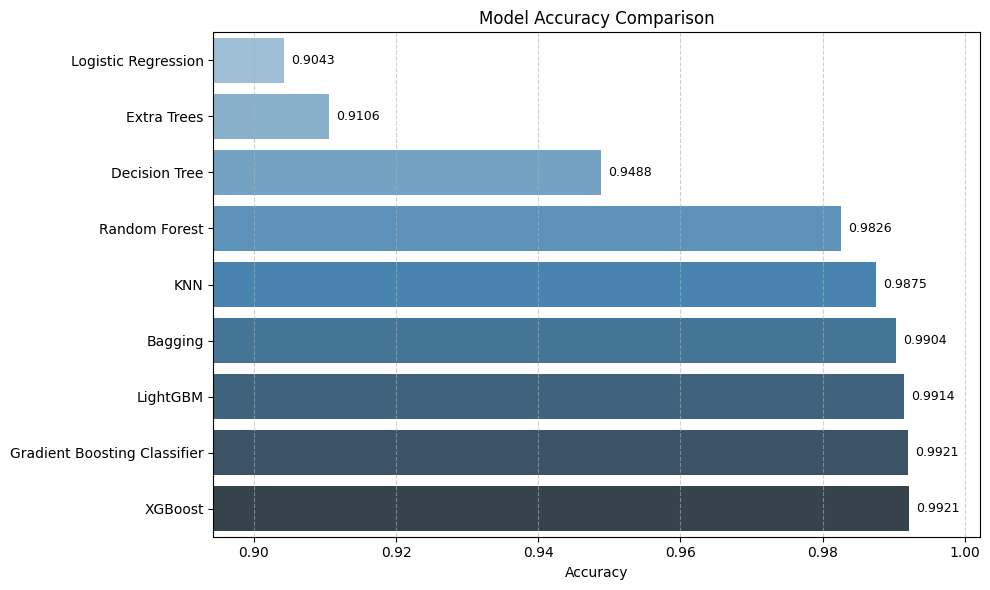

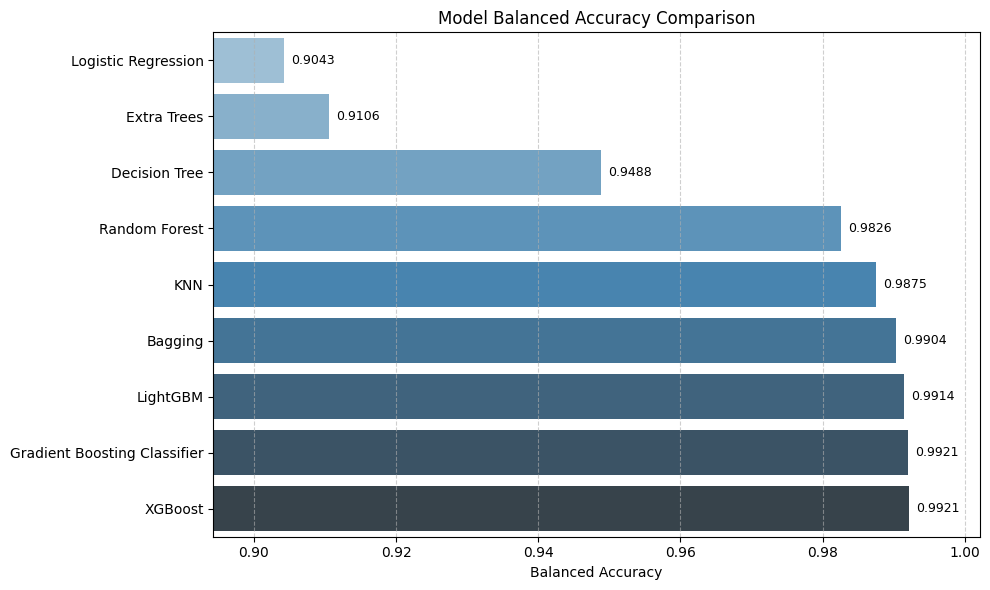

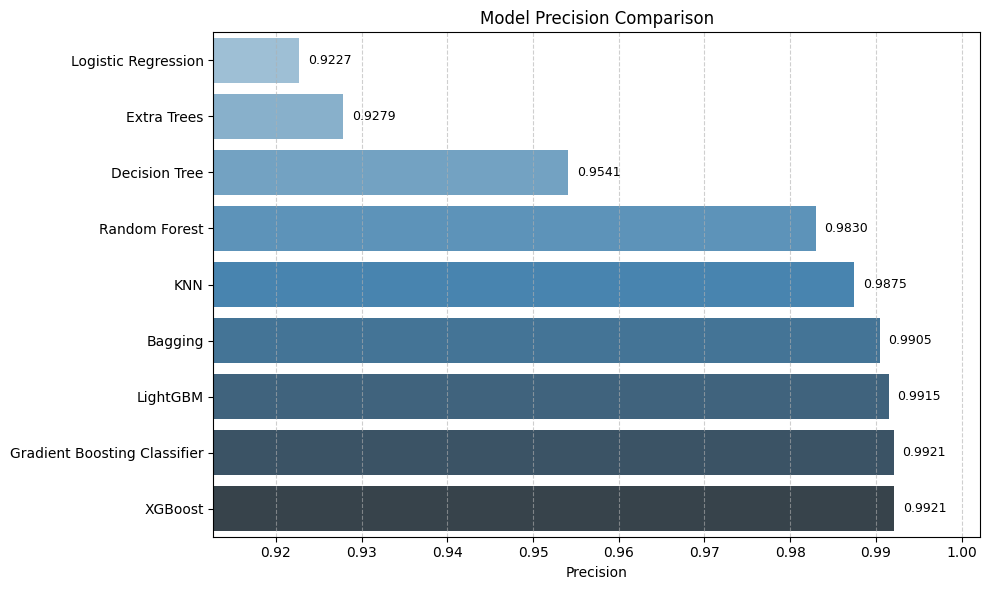

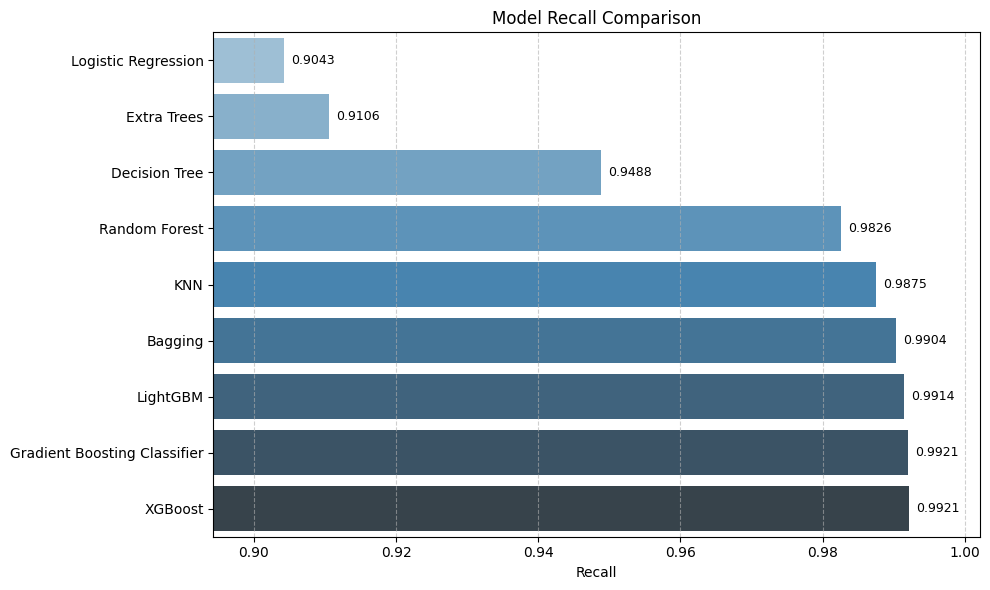

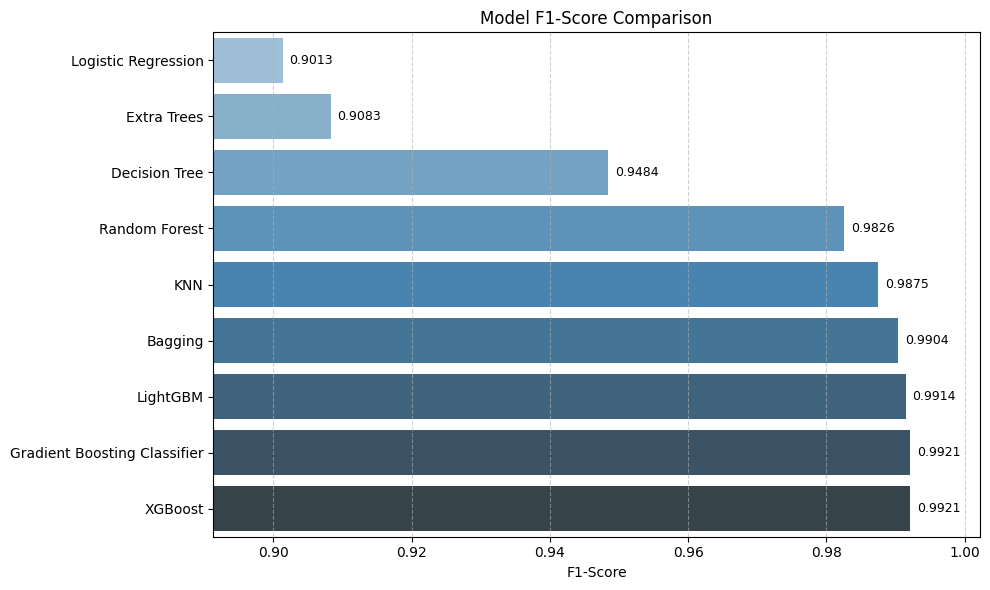

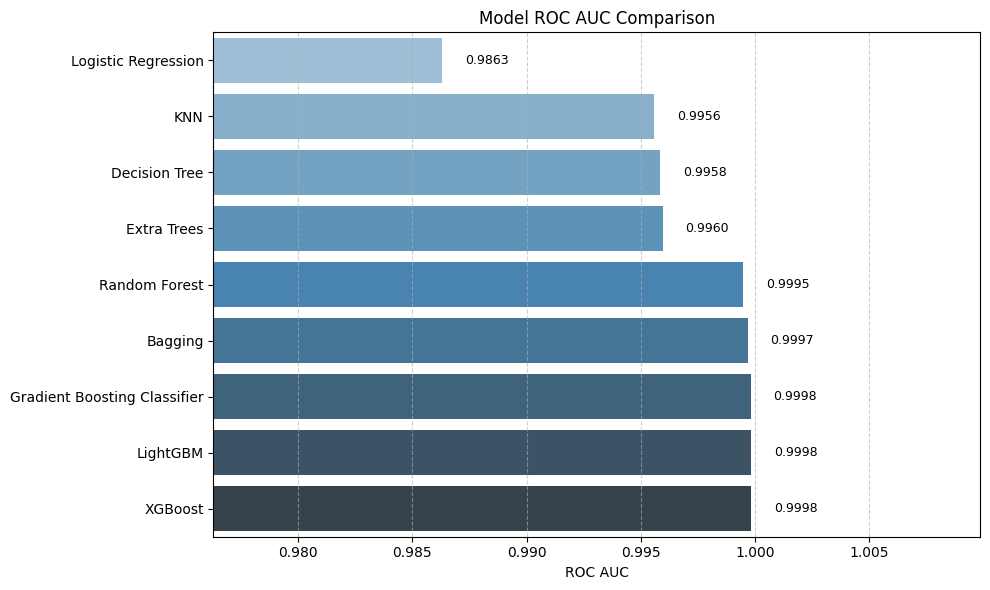

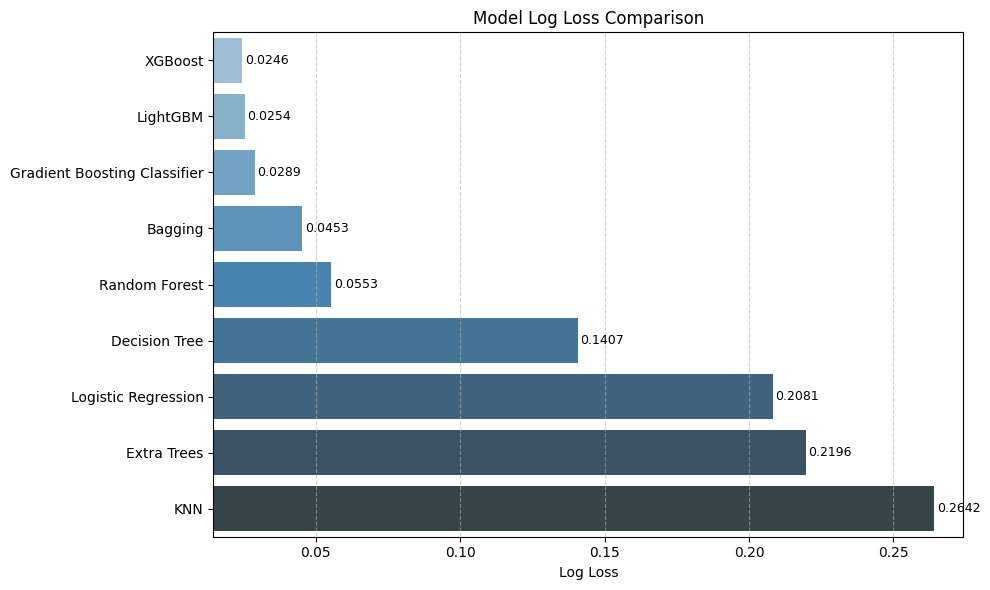

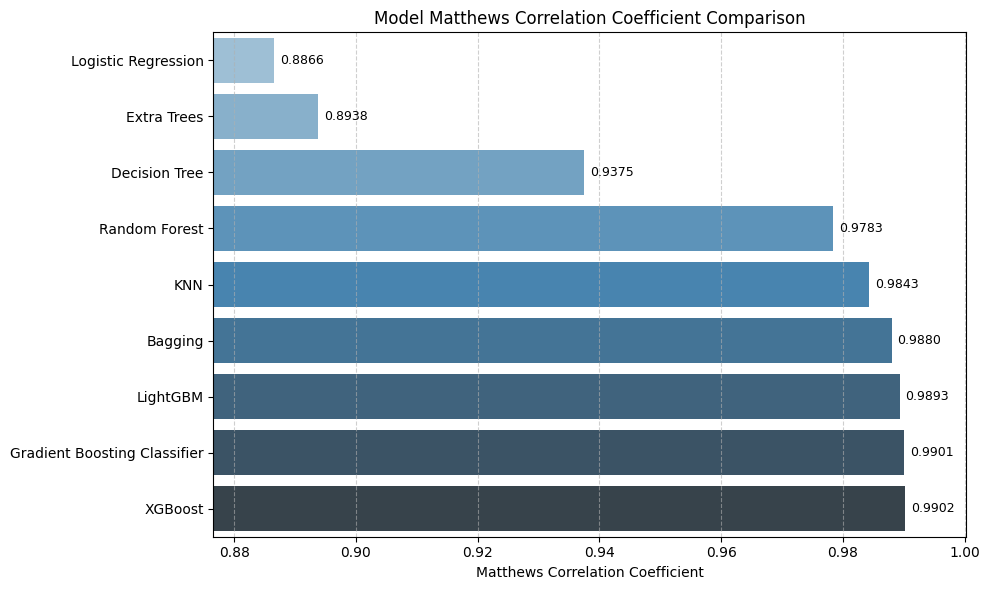

In [88]:
def GetMetric(metric : str) -> list:
    return [metrics[metric] for _ , metrics in ModelsMetrics.items()]

for metric in MetricNames:
    PlotArrayVSModelNames(GetMetric(metric), metric)

In [89]:
MinMaxMetricsIndex : dict[str, tuple] = {
}
for metric in MetricNames:
    min, max = numpy.argmin(GetMetric(metric)), numpy.argmax(GetMetric(metric))
    MinMaxMetricsIndex[metric] = (min, max)

In [90]:
# Print the model names corresponding to the indices
print(f'{"Minimum loss: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Log Loss'][0]]}, with a value of : ': <35}", GetMetric('Log Loss')[MinMaxMetricsIndex['Log Loss'][0]])
print(f'{"Maximum accuracy: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Accuracy'][1]]}, with a value of : ': <35}", GetMetric('Accuracy')[MinMaxMetricsIndex['Accuracy'][1]])
print(f'{"Maximum balanced accuracy: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Balanced Accuracy'][1]]}, with a value of : ': <35}", GetMetric('Balanced Accuracy')[MinMaxMetricsIndex['Balanced Accuracy'][1]])
print(f'{"Maximum precision: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Precision'][1]]}, with a value of : ': <35}", GetMetric('Precision')[MinMaxMetricsIndex['Precision'][1]])
print(f'{"Maximum recall: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Recall'][1]]}, with a value of : ': <35}", GetMetric('Recall')[MinMaxMetricsIndex['Recall'][1]])
print(f'{"Maximum F1 score: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['F1-Score'][1]]}, with a value of : ': <35}", GetMetric('F1-Score')[MinMaxMetricsIndex['F1-Score'][1]])
print(f'{"Maximum ROC AUC: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['ROC AUC'][1]]}, with a value of : ': <35}", GetMetric('ROC AUC')[MinMaxMetricsIndex['ROC AUC'][1]])
print(f'{"Maximum Matthews correlation coefficient: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Matthews Correlation Coefficient'][1]]}, with a value of : ': <35}", GetMetric('Matthews Correlation Coefficient')[MinMaxMetricsIndex['Matthews Correlation Coefficient'][1]])


Minimum loss:                                 XGBoost, with a value of :          0.024597852233326202
Maximum accuracy:                             XGBoost, with a value of :          0.99214
Maximum balanced accuracy:                    XGBoost, with a value of :          0.99214
Maximum precision:                            XGBoost, with a value of :          0.9921483096306637
Maximum recall:                               XGBoost, with a value of :          0.99214
Maximum F1 score:                             XGBoost, with a value of :          0.9921386051242314
Maximum ROC AUC:                              XGBoost, with a value of :          0.9998400084375
Maximum Matthews correlation coefficient:     XGBoost, with a value of :          0.9901777728729633


In [91]:
CurrentModels = {
    "LogisticRegression": ModelLR,
    "DecisionTree": ModelDT,
    "RandomForest": ModelRF,
    "KNN": ModelKNN,
    "XGBoost": ModelXGB,
    "LightGBM": ModelLGBM,
    "ExtraTrees": ModelETC,
    "Bagging": ModelBC,
    "Gradient Boosting Classifier": ModelGBC,
}
CurrentMetrics = ModelsMetrics

In [92]:
import joblib
import os

def SaveInfo(models, metrics, FilePath):
    os.makedirs(FilePath, exist_ok=True)
    joblib.dump(models, f'{FilePath}/Models.pkl')
    joblib.dump(metrics, f'{FilePath}/Metrics.pkl')
def LoadInfo(FilePath):
    mo = joblib.load(f'{FilePath}/Models.pkl')
    me = joblib.load(f'{FilePath}/Metrics.pkl')
    return mo, me

In [96]:
SaveInfo(CurrentModels, CurrentMetrics, 'MMFolder/Randomized')

# Balanced & UnBalanced Comparison

In [93]:
modelunbal, metricsunbal = LoadInfo('MMFolder/UnBalancedmm')
modelbal, metricsbal = LoadInfo('MMFolder/Balancedmm')

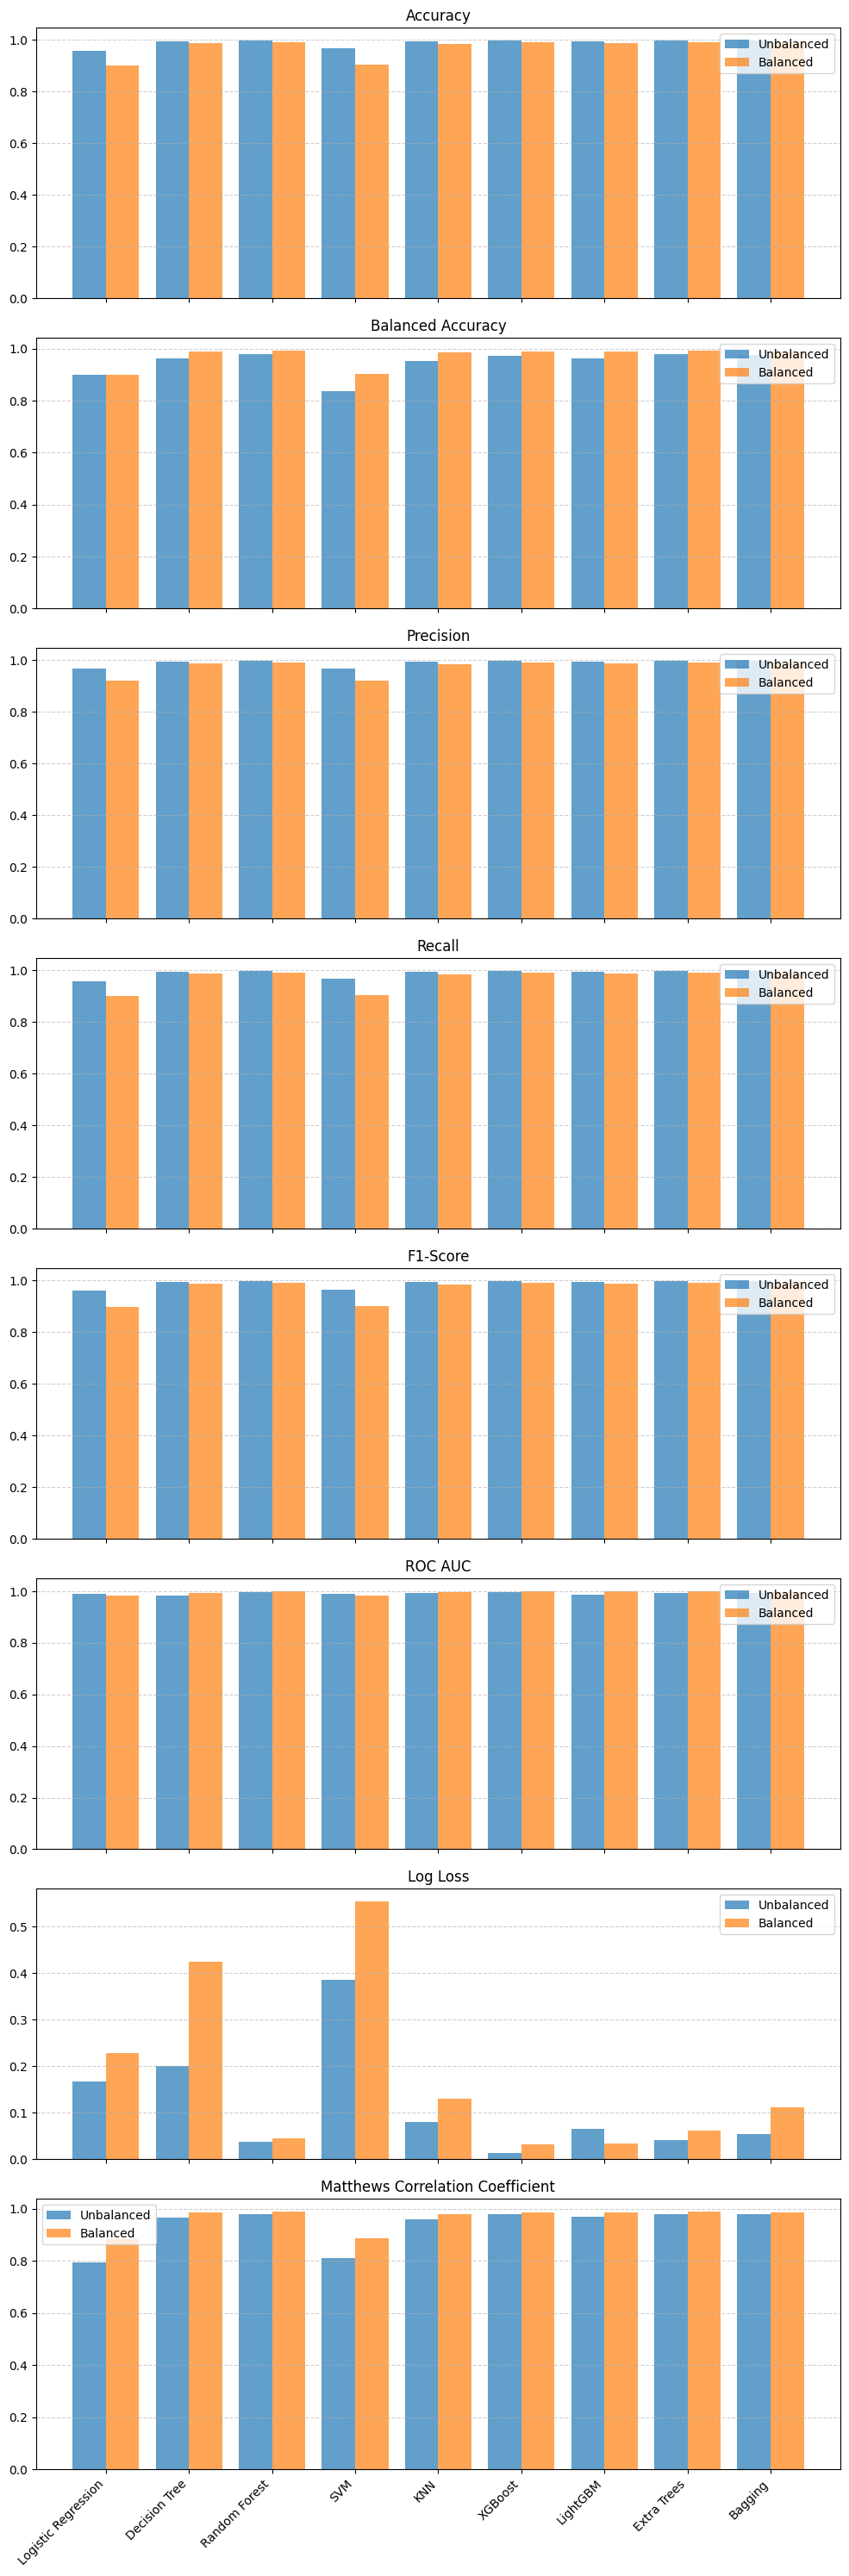

In [94]:
import numpy as np
import matplotlib.pyplot as plt

metrics_names = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Log Loss', 'Matthews Correlation Coefficient']
models = list(metricsbal.keys())

unbalanced_metrics = {metric: [metricsunbal[model][metric] for model in models] for metric in metrics_names}
balanced_metrics = {metric: [metricsbal[model][metric] for model in models] for metric in metrics_names}

fig, axes = plt.subplots(len(metrics_names), 1, figsize=(10, 30), sharex=True)
for i, metric in enumerate(metrics_names):
    axes[i].bar(np.arange(len(models)) - 0.2, unbalanced_metrics[metric], width=0.4, label='Unbalanced', alpha=0.7)
    axes[i].bar(np.arange(len(models)) + 0.2, balanced_metrics[metric], width=0.4, label='Balanced', alpha=0.7)
    axes[i].set_title(metric)
    axes[i].set_xticks(np.arange(len(models)))
    axes[i].set_xticklabels(models, rotation=45, ha='right')
    axes[i].legend()
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()